In [9]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [10]:
count = 0
images = []
classno = []
mylist = os.listdir("myData")
class_size = len(mylist)

for x in tqdm(mylist, desc='İşlenen Sınıf'):
    data = os.listdir("myData"+"/"+str(count))
    for y in data:
        img = cv2.imread("myData"+"/"+str(count)+"/"+y)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img/255
        images.append(img)
        classno.append(count)
    
    if count <= 41:
        count +=1
    
images = np.array(images)
classno = np.array(classno)

İşlenen Sınıf: 100%|████████████████████████████| 43/43 [00:01<00:00, 24.11it/s]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(images,classno,test_size=0.2)
print(x_train.shape, y_train.shape)

(27839, 32, 32) (27839,)


In [12]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train, class_size)
y_test = to_categorical(y_test, class_size)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27839, 32, 32, 1)
(6960, 32, 32, 1)
(27839, 43)
(6960, 43)


In [13]:
model = Sequential()

# Evrişim katmanı ve havuzlama katmanları
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) 

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) 

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2)) 

# Tam bağlantılı katmanlar
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) 

# Çıkış katmanı
model.add(Dense(class_size, activation='softmax'))

# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model özetini görüntüleme
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 64)         

In [14]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
datagen.fit(x_train)

hist=model.fit(datagen.flow(x_train, y_train, batch_size = 32), steps_per_epoch = len(x_train)/32, epochs =20, validation_data=(x_test, y_test))
model.save("tabela_tespit.h5")

Epoch 1/20


2024-02-16 21:27:37.285083: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


869/869 [==============================] - 13s 14ms/step - loss: 2.6775 - accuracy: 0.2432 - val_loss: 1.1885 - val_accuracy: 0.5790
Epoch 2/20
869/869 [==============================] - 12s 13ms/step - loss: 1.1072 - accuracy: 0.6441 - val_loss: 0.3994 - val_accuracy: 0.8862
Epoch 3/20
869/869 [==============================] - 12s 14ms/step - loss: 0.7088 - accuracy: 0.7705 - val_loss: 0.2396 - val_accuracy: 0.9283
Epoch 4/20
869/869 [==============================] - 12s 13ms/step - loss: 0.5336 - accuracy: 0.8287 - val_loss: 0.1476 - val_accuracy: 0.9601
Epoch 5/20
869/869 [==============================] - 11s 13ms/step - loss: 0.4216 - accuracy: 0.8641 - val_loss: 0.1101 - val_accuracy: 0.9644
Epoch 6/20
869/869 [==============================] - 11s 13ms/step - loss: 0.3764 - accuracy: 0.8789 - val_loss: 0.0852 - val_accuracy: 0.9746
Epoch 7/20
869/869 [==============================] - 11s 13ms/step - loss: 0.3309 - accuracy: 0.8945 - val_loss: 0.0640 - val_accuracy: 0.9826
Epo

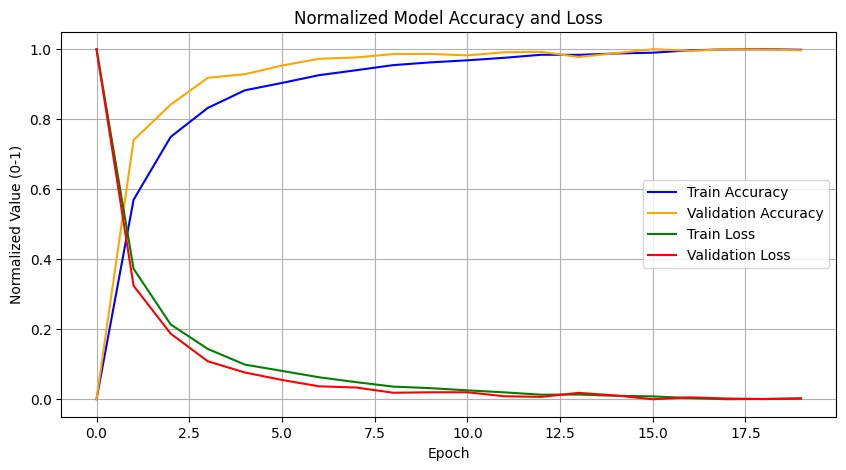

In [23]:
# Verileri normalize etme
def normalize_data(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

plt.figure(figsize=(10, 5))

# Accuracy ve Loss verilerini normalize etme
normalized_accuracy = normalize_data(hist.history['accuracy'])
normalized_val_accuracy = normalize_data(hist.history['val_accuracy'])
normalized_loss = normalize_data(hist.history['loss'])
normalized_val_loss = normalize_data(hist.history['val_loss'])

# Accuracy
plt.plot(normalized_accuracy, label='Train Accuracy', color='blue')
plt.plot(normalized_val_accuracy, label='Validation Accuracy', color='orange')

# Loss
plt.plot(normalized_loss, label='Train Loss', color='green')
plt.plot(normalized_val_loss, label='Validation Loss', color='red')

plt.title('Normalized Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Normalized Value (0-1)')

plt.legend()
plt.grid(True)
plt.show()

In [24]:
import cv2
import numpy as np
import pandas as pd
from keras.models import load_model

model = load_model("tabela_tespit.h5")
data = pd.read_csv("labels.csv")
labels = pd.DataFrame(data)

img = cv2.imread("asd.png",0)
img = cv2.resize(img, (32, 32))
img = cv2.equalizeHist(img)
img = img/255.
img = np.asarray(img)
img = img.reshape(1, 32, 32, 1)

predictions = model.predict(img)
probabilityValue =np.amax(predictions)

print(f"\nTabela: {str(labels.loc[predictions.argmax(),'Name'])} / Doğruluk: {probabilityValue}")

1/1 [==============================] - 0s 209ms/step

Tabela: Bicycles crossing / Doğruluk: 0.9527482390403748
